<h1 align=center><font size = 5>Data Science amb Python</font></h1>



## Sprint 12 
#### S12 T01 : Supervised Learning - Regressions

#### Cristiane de Souza da Silva

June 2021

### Dataset Description

#### Airline2008Nov Dataset Variable definition

 Name                |  Description      
---------------------|:-------------
1.Year               |  2008 
2.Month              |   11
3.DayofMonth         |   1-31
4.DayOfWeek          |  1 (Monday) - 7 (Sunday)
5.DepTime            |actual departure time (local, hhmm)
6.CRSDepTime         |scheduled departure time (local, hhmm)
7.ArrTime            |actual arrival time (local, hhmm)
8.CRSArrTime         |scheduled arrival time (local, hhmm)
9.UniqueCarrier      |unique carrier code
10.FlightNum         |flight number
11.TailNum           |plane tail number
12.ActualElapsedTime |in minutes
13.CRSElapsedTime    |CRS Elapsed Time of Flight (estimated elapse time), in minutes
14.AirTime           |Flight Time, in Minutes, in minutes
15.ArrDelay          |Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers, in minutes
16.DepDelay          |Difference in minutes between scheduled and actual departure time. Early departures show negative numbers, in minutes
17.Origin            |origin IATA airport code
18.Dest              |destination IATA airport code
19.Distance          |Distance between airports (miles)
20.TaxiIn            |Wheels down and arrival at the destination airport gate, in minutes           
21.TaxiOut           |The time elapsed between departure from the origin airport gate and wheels off, in minutes
22.Cancelled         |was the flight cancelled?
23.CancellationCode  |reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24.Diverted          |1 = yes, 0 = no
25.CarrierDelay      |minutes. Carrier delay is within the control of the air carrier. Examples:: aircraft cleaning, aircraft damage, etc
26.WeatherDelay      |munutes. Weather delay is caused by extreme or hazardous weather conditions
27.NASDelay          |minutes. Delay that is within the control of the National Airspace System (NAS) Ex:airport operations,heavy traffic volume,etc
28.SecurityDelay     |minutes. caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach,etc  
29.LateAircraftDelay |minutes. Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport.           

More information about flights delay can be seen in [Federal Aviation Administration site](https://aspmhelp.faa.gov/index/Types_of_Delay.html).

### Exercise 1

Create at least three different regression models to try to best predict DelayedFlights.csv flight delay (ArrDelay).


### 1. Load the dataset

I'll import the dataset cleaned from the previous sprint 11.

In [1]:
# import the needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataframe

df_flights = pd.read_csv('DelayedFlights_clean.csv')
df_flights.head()

,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,1,3,4,2003.0,2211.0,WN,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810
1,1,3,4,754.0,1002.0,WN,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810
2,1,3,4,628.0,804.0,WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515
3,1,3,4,1829.0,1959.0,WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515
4,1,3,4,1940.0,2121.0,WN,101.0,115.0,87.0,11.0,25.0,IND,JAX,688


In [3]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928371 entries, 0 to 1928370
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayofMonth         int64  
 2   DayOfWeek          int64  
 3   DepTime            float64
 4   ArrTime            float64
 5   UniqueCarrier      object 
 6   ActualElapsedTime  float64
 7   CRSElapsedTime     float64
 8   AirTime            float64
 9   ArrDelay           float64
 10  DepDelay           float64
 11  Origin             object 
 12  Dest               object 
 13  Distance           int64  
dtypes: float64(7), int64(4), object(3)
memory usage: 206.0+ MB


#### Exploratory Data Analysis

In [4]:
# average of arrive delay by month
month_mean = pd.DataFrame(df_flights.groupby('Month')['ArrDelay'].mean()).reset_index()
month_mean

,Month,ArrDelay
0,1,42.801492
1,2,45.006123
2,3,41.914769
3,4,38.835305
4,5,37.593572
5,6,46.532728
6,7,45.995136
7,8,41.434409
8,9,35.168126
9,10,31.385769


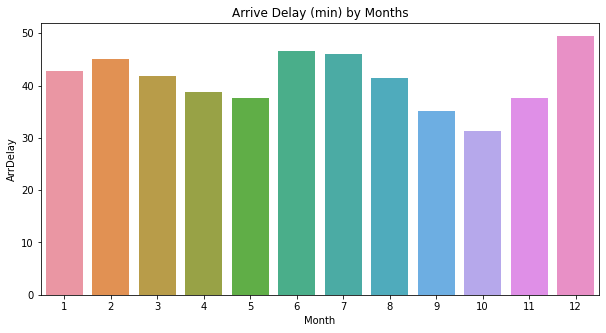

In [5]:
# Month
plt.figure(figsize=(10,5))
sns.barplot( x='Month', y='ArrDelay',data=month_mean)
plt.title('Arrive Delay (min) by Months');


The month where the average delay is higher is December whereas the lower mean is Octobre

In [6]:
day_mean = pd.DataFrame(df_flights.groupby('DayOfWeek')['ArrDelay'].mean()).reset_index()
day_mean

,DayOfWeek,ArrDelay
0,1,41.731356
1,2,43.806679
2,3,40.438229
3,4,41.071599
4,5,43.493618
5,6,39.393828
6,7,44.697413


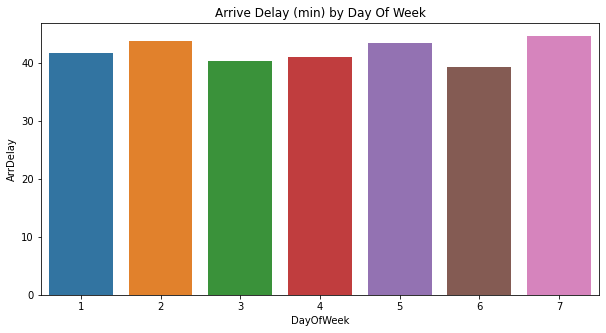

In [7]:
# Day
plt.figure(figsize=(10,5))
sns.barplot( x='DayOfWeek', y='ArrDelay',data=day_mean)
plt.title('Arrive Delay (min) by Day Of Week');

In [8]:
#Data Transforming

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat = df_flights[['UniqueCarrier','Origin', 'Dest' ]]
df_cat.head()

,UniqueCarrier,Origin,Dest
0,WN,IAD,TPA
1,WN,IAD,TPA
2,WN,IND,BWI
3,WN,IND,BWI
4,WN,IND,JAX


In [9]:
df_transform = df_flights.copy()

for col in df_cat:
    df_transform[col] = le.fit_transform(df_cat[col])

    
df_transform.head()

,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,1,3,4,2003.0,2211.0,17,128.0,150.0,116.0,-14.0,8.0,135,284,810
1,1,3,4,754.0,1002.0,17,128.0,145.0,113.0,2.0,19.0,135,284,810
2,1,3,4,628.0,804.0,17,96.0,90.0,76.0,14.0,8.0,140,48,515
3,1,3,4,1829.0,1959.0,17,90.0,90.0,77.0,34.0,34.0,140,48,515
4,1,3,4,1940.0,2121.0,17,101.0,115.0,87.0,11.0,25.0,140,149,688


#### Correlation

Let's check the features that better met with the target.

For this case, let' use the  correlation (Pearson's) between the **ArrDelay** target and the other attributes.

In [10]:
# using the corr() method

corr_matrix = df_transform.corr()

# How much each attribute correlates with the Arrival Delay
corr_matrix['ArrDelay'].sort_values(ascending=False)

ArrDelay             1.000000
DepDelay             0.952927
DepTime              0.127017
ActualElapsedTime    0.068130
DayOfWeek            0.006123
DayofMonth           0.004129
AirTime             -0.000189
Month               -0.000897
Origin              -0.001597
Dest                -0.014805
CRSElapsedTime      -0.015676
Distance            -0.029853
UniqueCarrier       -0.037337
ArrTime             -0.050948
Name: ArrDelay, dtype: float64

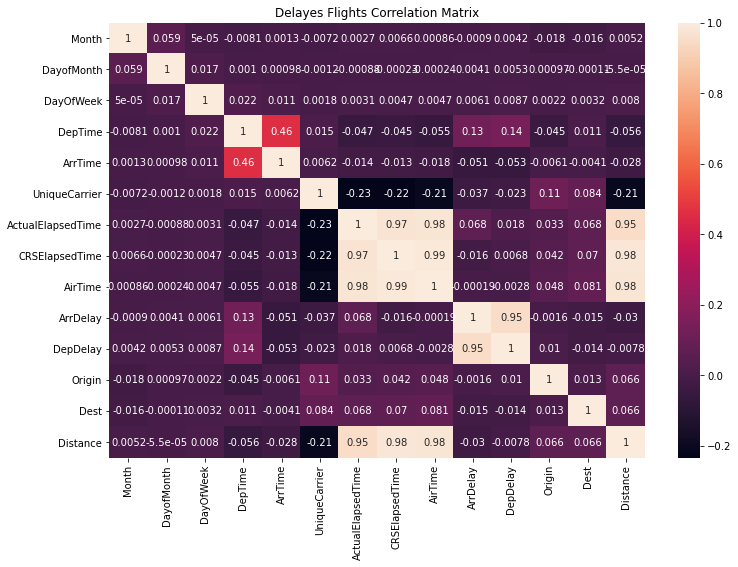

In [11]:
# Matrix correlation

plt.figure(figsize=(12,8))

sns.heatmap(corr_matrix, annot=True)
plt.title('Delayes Flights Correlation Matrix')
plt.show()

### 3. Model Development

#### Training and Test

In [12]:
from sklearn.model_selection import train_test_split

y = df_transform['ArrDelay']

X = df_transform.drop('ArrDelay',axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 578512
number of training samples: 1349859


#### Linear Regression

Fit a linear regression model using the  DepDelay feature, which have the biggest correlation coefficient

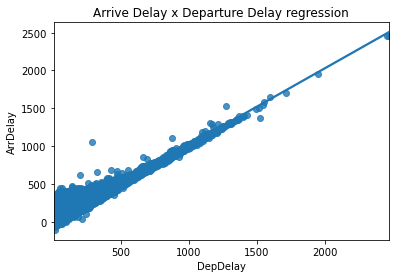

In [14]:
sns.regplot(x="DepDelay", y="ArrDelay", data=df_transform)
plt.title('Arrive Delay x Departure Delay regression');

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [16]:
lr=LinearRegression()
lr.fit(X_train[['DepDelay']], y_train)

LinearRegression()

In [17]:
#Calculate the R^2 on the test data:

r2_lr = lr.score(X_test[['DepDelay']], y_test)
r2_lr

0.9089131986650585

In [18]:
yhat_test_lr = lr.predict(X_test[['DepDelay']])
yhat_test_lr

array([38.04535139,  7.56674327,  7.56674327, ..., 37.02939779,
        6.55078967,  9.59865048])

In [19]:
MSE_lr = np.square(np.subtract(yhat_test_lr,y_test)).mean()
MSE_lr

296.24644740741746

#### Multiple linear regression

I choose the features most correlated with the ArrDelay

In [20]:
lrm=LinearRegression()
lrm.fit(X_train[['DepDelay', 'DepTime', 'ActualElapsedTime', 'DayOfWeek', 'DayofMonth']], y_train)

#Prediction using test data:
yhat_test_lrm = lrm.predict(X_test[['DepDelay', 'DepTime', 'ActualElapsedTime', 'DayOfWeek', 'DayofMonth']])
yhat_test_lrm[0:5]

array([36.63418163,  4.76897249,  6.55394339, 27.57827137,  9.94032713])

In [21]:
#Calculate the R^2 on the test data:

r2_lrm = lrm.score(X_test[['DepDelay', 'DepTime', 'ActualElapsedTime', 'DayOfWeek', 'DayofMonth']], y_test)
r2_lrm

0.9114066193226147

In [22]:
MSE_lrm = np.square(np.subtract(yhat_test_lrm,y_test)).mean()
MSE_lrm

288.13696281838975

#### Polynomial Regression

In [23]:
from sklearn.preprocessing import PolynomialFeatures

pr1=PolynomialFeatures(degree=2)

X_train_pr1=pr1.fit_transform(X_train)


X_pr1 now contains the original feature of X  plus the square of this feature.

In [24]:
X_train_pr1.shape

(1349859, 105)

In [25]:
lr_poly = LinearRegression()

train_y_ = lr_poly.fit(X_train_pr1, y_train)

In [26]:
from sklearn.metrics import r2_score

X_test_pr1 = pr1.fit_transform(X_test)
test_y_ = lr_poly.predict(X_test_pr1)

In [27]:

MSE_poly =  np.mean((test_y_ - y_test) ** 2)
r2_poly = r2_score(y_test,test_y_ ) 

In [28]:
MSE_poly

5.183904349632293e-06

In [29]:
r2_poly

0.9999999984061065

In [30]:
yhat_test_poly=lr_poly.predict(X_test_pr1)
yhat_test_poly

array([43.00001036,  0.99999422, -0.9999964 , ..., 39.9999916 ,
       10.99998558, 31.00000917])

In [31]:
r2_poly = lr_poly.score(X_test_pr1, y_test)
r2_poly

0.9999999984061065

In [32]:
MSE_poly = np.square(np.subtract(yhat_test_poly,y_test)).mean()
MSE_poly

5.183904349632293e-06

#### Ridge regression

In [33]:
from sklearn.linear_model import Ridge

RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(X_train, y_train)

r2_rdg = RidgeModel.score(X_test, y_test)
r2_rdg

0.9999999984056435

In [34]:
yhat_test_rdg=RidgeModel.predict(X_test)

In [35]:
MSE_rdg = np.square(np.subtract(yhat_test_rdg,y_test)).mean()
MSE_rdg

5.185410412183048e-06

#### Decision Tree Regression

In [36]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [37]:
yhat_tree = regressor.predict(X_test)
r2_tree = regressor.score(X_test, y_test)
r2_tree

0.9957803518058488

In [38]:
MSE_tre = np.square(np.subtract(yhat_tree,y_test)).mean()
MSE_tre

13.723786196310535

### Exercises 2

Compare them based on MSE and R2.


In [39]:
measure_eval = pd.DataFrame({'Measure': ['R2', 'MSE'], 
                             'Lin_Reg': [r2_lr, MSE_lr],
                             'Mult_Lin_Reg':[r2_lrm,MSE_lrm],
                             'Poly_Reg': [r2_poly, MSE_poly],
                             'Ridge_Reg': [r2_rdg,MSE_rdg], 
                             'Decision_Tree': [r2_tree,MSE_tre]
                            })
measure_eval

,Measure,Lin_Reg,Mult_Lin_Reg,Poly_Reg,Ridge_Reg,Decision_Tree
0,R2,0.908913,0.911407,1.000000,1.000000,0.995780
1,MSE,296.246447,288.136963,0.000005,0.000005,13.723786


### Exercises 3

Train them using the different parameters they support.

The term Alfa is a hyperparameter
Let's import GridSearchCV from the module model_selection.

In [40]:
from sklearn.model_selection import GridSearchCV

#create a dictionary of parameters values

parameters= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [41]:
# Create a Ridge  region object
RR=Ridge()

#Create a ridge grid search object
Grid = GridSearchCV(RR, parameters,cv=4)

In [42]:
#Fit the model
Grid.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [43]:
#Obtain the estimator with the best parameters 
BestRR=Grid.best_estimator_
BestRR

Ridge(alpha=0.001)

In [44]:
#test our model on the test data
BestRR.score(X_test, y_test)

0.9999999984056435

### Exercises 4

Compare your performance using the traint / test approach or using all data (internal validation)

I'll use the Multiple Linear Regression as a example , using all the X and y data instead of split them in train and test ones.

#### Multiple Linear Regression- Using all data

In [45]:
lrm.fit(X, y)

LinearRegression()

In [46]:
yhat_lrmall=lrm.predict(X)
yhat_lrmall[0:5]

array([-13.99999103,   1.99999961,  13.99999238,  33.99999969,
        11.00000232])

In [47]:
r2_rlmall = lrm.score(X,y)
r2_rlmall

0.9999999980702016

With all data used, the r-squared in Multiple Linear Regression was 0.999. This value is less that 0.911, when there was the splitted of the original dataset (X and y).

The r2 increased because I evaluated the predictived performance of the model with the same data I used for training. Although the r2 is higher,  that doesn't mean it's better, after all,  it was a biased evaluation.

### Exercises 5

Perform some variable engineering process to improve prediction.

Let's create a attribute to see if the weekend influences the flight delay.

In [48]:
# Create 'weekend' attribute
df_new = df_transform.copy()

df_new['weekend'] = np.where(df_new['DayOfWeek']>=6, 1, 0)
df_new.head()

,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,weekend
0,1,3,4,2003.0,2211.0,17,128.0,150.0,116.0,-14.0,8.0,135,284,810,0
1,1,3,4,754.0,1002.0,17,128.0,145.0,113.0,2.0,19.0,135,284,810,0
2,1,3,4,628.0,804.0,17,96.0,90.0,76.0,14.0,8.0,140,48,515,0
3,1,3,4,1829.0,1959.0,17,90.0,90.0,77.0,34.0,34.0,140,48,515,0
4,1,3,4,1940.0,2121.0,17,101.0,115.0,87.0,11.0,25.0,140,149,688,0


In [49]:
df_new['weekend'].value_counts()

0    1421230
1     507141
Name: weekend, dtype: int64

#### New Correlation

New correlation considering the new attribute ' weekend'

In [50]:
corr_matrix = df_new.corr()

# How much each attribute correlates with the Arrival Delay
corr_matrix['ArrDelay'].sort_values(ascending=False)

ArrDelay             1.000000
DepDelay             0.952927
DepTime              0.127017
ActualElapsedTime    0.068130
DayOfWeek            0.006123
DayofMonth           0.004129
weekend              0.001828
AirTime             -0.000189
Month               -0.000897
Origin              -0.001597
Dest                -0.014805
CRSElapsedTime      -0.015676
Distance            -0.029853
UniqueCarrier       -0.037337
ArrTime             -0.050948
Name: ArrDelay, dtype: float64

The attribute 'weekend' has a small and positive correlation with the target 'ArrDelay'. 

That's confirm that on weekends the arrive delays are a little bigger.

### Exercises 6

Do not use the DepDelay variable when making predictions

#### New Train and Test

In [51]:
# Create new dataset for attributes and target

y_new = df_new['ArrDelay']

X_new = df_new.drop(['ArrDelay', 'DepDelay'],axis=1)

In [52]:
# New split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.35, random_state=3)

print("number of test samples :", X_test_new.shape[0])
print("number of training samples:",X_train_new.shape[0])

number of test samples : 674930
number of training samples: 1253441


#### Multiple Linear Regression - No 'DepDelay'

Now, I'll consider all attributes but 'DepDelay'

In [53]:
lrm2=LinearRegression()
lrm2.fit(X_train_new, y_train_new)

#Prediction using test data:
yhat_test_new = lrm2.predict(X_test_new)
yhat_test_new[0:5]

array([ 3.78296201, 39.92019647, 40.8348433 , 26.46675383, 36.65337127])

In [54]:
#Calculate the R^2 on the test data:

r2_lrm_new = lrm2.score(X_test_new, y_test_new)
r2_lrm_new

0.1634381956858456

In [55]:
MSE_lrm_new = np.square(np.subtract(yhat_test_new, y_test_new)).mean()
MSE_lrm_new

2707.245460974804

#### Polynomial Regression - No 'DepDelay'

In [56]:

pr2=PolynomialFeatures(degree=2)

X_train_pr2=pr2.fit_transform(X_train_new)

In [57]:
lr_poly2 = LinearRegression()

new_train_y_ = lr_poly2.fit(X_train_pr2, y_train_new)

In [58]:
X_test_pr2 = pr1.fit_transform(X_test_new)
new_test_y_ = lr_poly2.predict(X_test_pr2)

In [59]:
MSE_poly2 =  np.mean((new_test_y_ - y_test_new) ** 2)
r2_poly2 = r2_score(y_test_new,new_test_y_ ) 

In [60]:
MSE_poly2

2574.0157370475217

In [61]:
r2_poly2

0.20460731013944933

#### Ridge regression - No 'DepDelay'

In [62]:
from sklearn.linear_model import Ridge

RidgeModel2 = Ridge(alpha=0.1)
RidgeModel2.fit(X_train_new, y_train_new)
r2_rdg_new = RidgeModel2.score(X_test_new, y_test_new)
r2_rdg_new

0.16343819571681495

In [63]:
yhat_test_rdg2=RidgeModel.predict(X_test_new)
MSE_rdg2 = np.square(np.subtract(yhat_test_rdg2, y_test_new)).mean()
MSE_rdg2

19866.179321959396

#### Decision Tree - No 'DepDelay'

In [64]:
regressor_new = DecisionTreeRegressor(random_state=5)
regressor_new.fit(X_train_new, y_train_new)

DecisionTreeRegressor(random_state=5)

In [65]:
yhat_tree_new = regressor_new.predict(X_test_new)
r2_tree_new = regressor_new.score(X_test_new, y_test_new)
r2_tree_new

-0.18697835393844664

The r2 score is **negative** because the model is arbitrarily worse without the attribute 'DepDelay'.

In [66]:
MSE_tre_new = np.square(np.subtract(yhat_tree_new, y_test_new)).mean()
MSE_tre_new

3841.248482064807

In [67]:
measure_eval_new = pd.DataFrame({'Measure_new': ['R2', 'MSE'], 
                             'Mult_Lin_Reg':[r2_lrm_new, MSE_lrm_new],
                             'Poly_Reg': [r2_poly2, MSE_poly2],
                             'Ridge_Reg': [r2_rdg_new,MSE_rdg2], 
                             'Decision_Tree': [r2_tree_new, MSE_tre_new]
                            })
measure_eval_new

,Measure_new,Mult_Lin_Reg,Poly_Reg,Ridge_Reg,Decision_Tree
0,R2,0.163438,0.204607,0.163438,-0.186978
1,MSE,2707.245461,2574.015737,19866.179322,3841.248482
